     cylinder, center = (0,0,0)
          radius 3.5, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (12,12,12)
     block, center = (0,3.71,0)
          size (40,0.22,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
     block, center = (0,-3.71,0)
          size (40,0.22,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
     prism, center = (3.05035,-7.11237e-17,5e+19)
          height 1e+20, axis (0,0,1), sidewall angle: 0 radians, 256 vertices:
          (1.905,-3.29956,0)
          (1.95915,-3.26769,0)
          (2.01277,-3.23494,0)
          (2.06584,-3.20131,0)
          (2.11835,-3.16681,0)
          (2.17029,-3.13144,0)
          (2.22163,-3.09523,0)
          (2.27237,-3.05817,0)
          (2.3225,-3.02028,0)
          (2.37199,-2.98157,0)
          (2.42083,-2.94205,0)
          (2.46902,-2.90173,0)
          (2.51653,-2.86062,0)

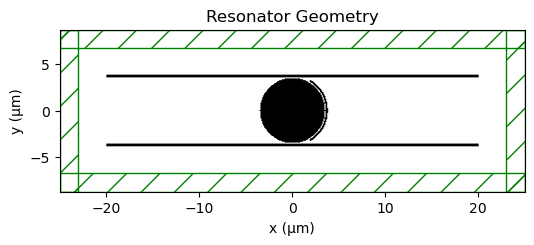

In [2]:
import meep as mp
import matplotlib.pyplot as plt
import numpy as np
import math

# -----------------------------
# Simulation parameters
# -----------------------------
resolution = 10  # pixels/um
gaas = mp.Medium(epsilon=12)

# Disk + waveguide parameters
disk_radius = 3.5
wg_length = 40
wg_width = 0.22
gap = 0.1       # distance between bus/drop guides and disk
gap_tune = 0.2  # distance for curved tuner

# Simulation cell
cell_x = wg_length + 10
cell_y = 2*(disk_radius + gap + wg_width/2) + 10
cell = mp.Vector3(cell_x, cell_y, 0)

pml_layers = [mp.PML(2.0)]

# -----------------------------
# Curved tuner helper function
# -----------------------------
def arc_prism(radius, width, angle_start, angle_end, npoints=64, material=gaas):
    """
    Create a curved waveguide arc as a polygonal prism.
    radius: centerline radius of the arc
    width: waveguide width
    angle_start, angle_end: arc angles (radians)
    npoints: polygon resolution
    """
    r_in = radius - width/2
    r_out = radius + width/2
    
    outer = [mp.Vector3(r_out*np.cos(a), r_out*np.sin(a)) 
             for a in np.linspace(angle_start, angle_end, npoints)]
    inner = [mp.Vector3(r_in*np.cos(a), r_in*np.sin(a)) 
             for a in np.linspace(angle_end, angle_start, npoints)]
    vertices = outer + inner
    
    return mp.Prism(vertices=vertices, height=mp.inf, material=material)

# -----------------------------
# Geometry
# -----------------------------
geometry = [
    # Disk
    mp.Cylinder(radius=disk_radius, height=mp.inf, material=gaas, center=mp.Vector3()),
    
    # Top bus waveguide
    mp.Block(size=mp.Vector3(wg_length, wg_width, mp.inf),
             center=mp.Vector3(0, disk_radius+gap+wg_width/2),
             material=gaas),

    # Bottom drop waveguide
    mp.Block(size=mp.Vector3(wg_length, wg_width, mp.inf),
             center=mp.Vector3(0, -disk_radius-gap-wg_width/2),
             material=gaas),
    
    # Curved tuner hugging right side of disk
    arc_prism(radius=disk_radius+gap_tune,
              width=wg_width,
              angle_start=-np.pi/3,
              angle_end=np.pi/3,
              npoints=128,
              material=gaas)
]

# -----------------------------
# Plot geometry
# -----------------------------
sim = mp.Simulation(cell_size=cell,
                    geometry=geometry,
                    boundary_layers=pml_layers,
                    resolution=resolution)

fig, ax = plt.subplots(figsize=(6,6))
sim.plot2D(ax=ax)
plt.title("Resonator Geometry")
plt.xlabel("x (µm)")
plt.ylabel("y (µm)")
plt.show()


-----------
Initializing structure...
time for choose_chunkdivision = 0.00435519 s
Working in 2D dimensions.
Computational cell is 50 x 17.4333 x 0 with resolution 30
     cylinder, center = (0,0,0)
          radius 3.5, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (12,12,12)
     block, center = (0,3.71,0)
          size (40,0.22,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
     block, center = (0,-3.71,0)
          size (40,0.22,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
     prism, center = (3.05035,-7.11237e-17,5e+19)
          height 1e+20, axis (0,0,1), sidewall angle: 0 radians, 256 vertices:
          (1.905,-3.29956,0)
          (1.95915,-3.26769,0)
          (2.01277,-3.23494,0)
          (2.06584,-3.20131,0)
          (2.11835,-3.16681,0)
          (2.17029,-3.13144,0)
          (2.22163,-3.09523,0)
          (2.2723

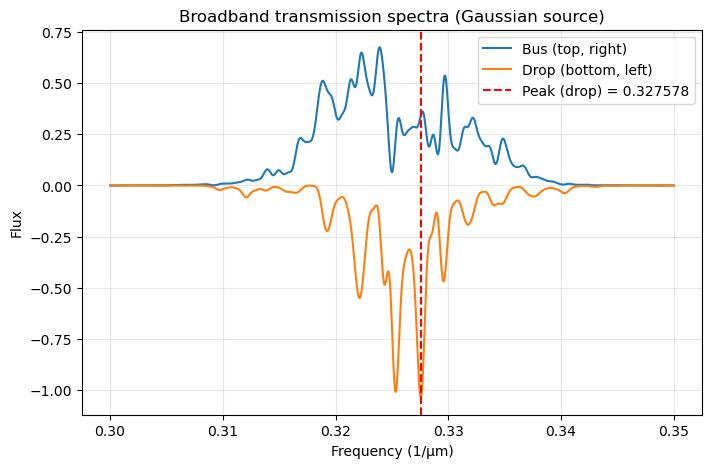

-----------
Initializing structure...
time for choose_chunkdivision = 0.00655508 s
Working in 2D dimensions.
Computational cell is 50 x 17.4333 x 0 with resolution 30
     cylinder, center = (0,0,0)
          radius 3.5, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (12,12,12)
     block, center = (0,3.71,0)
          size (40,0.22,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
     block, center = (0,-3.71,0)
          size (40,0.22,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
     prism, center = (3.05035,-7.11237e-17,5e+19)
          height 1e+20, axis (0,0,1), sidewall angle: 0 radians, 256 vertices:
          (1.905,-3.29956,0)
          (1.95915,-3.26769,0)
          (2.01277,-3.23494,0)
          (2.06584,-3.20131,0)
          (2.11835,-3.16681,0)
          (2.17029,-3.13144,0)
          (2.22163,-3.09523,0)
          (2.2723

FloatProgress(value=0.0, description='0% done ', max=1000.0)

Meep progress: 3.1666666666666665/1000.0 = 0.3% done in 4.0s, 1265.3s to go
on time step 190 (time=3.16667), 0.0210767 s/step
Meep progress: 6.866666666666666/1000.0 = 0.7% done in 8.0s, 1160.5s to go
on time step 413 (time=6.88333), 0.0180647 s/step
Meep progress: 10.05/1000.0 = 1.0% done in 12.0s, 1185.1s to go
on time step 605 (time=10.0833), 0.0208667 s/step
Meep progress: 12.833333333333334/1000.0 = 1.3% done in 16.1s, 1235.1s to go
on time step 772 (time=12.8667), 0.0240894 s/step
Meep progress: 16.416666666666668/1000.0 = 1.6% done in 20.1s, 1202.1s to go
on time step 988 (time=16.4667), 0.0185627 s/step
Meep progress: 19.766666666666666/1000.0 = 2.0% done in 24.1s, 1193.6s to go
on time step 1189 (time=19.8167), 0.0200029 s/step
Meep progress: 26.233333333333334/1000.0 = 2.6% done in 28.1s, 1042.0s to go
on time step 1578 (time=26.3), 0.0103213 s/step
Meep progress: 29.599999999999998/1000.0 = 3.0% done in 32.1s, 1052.0s to go
on time step 1780 (time=29.6667), 0.0198557 s/step


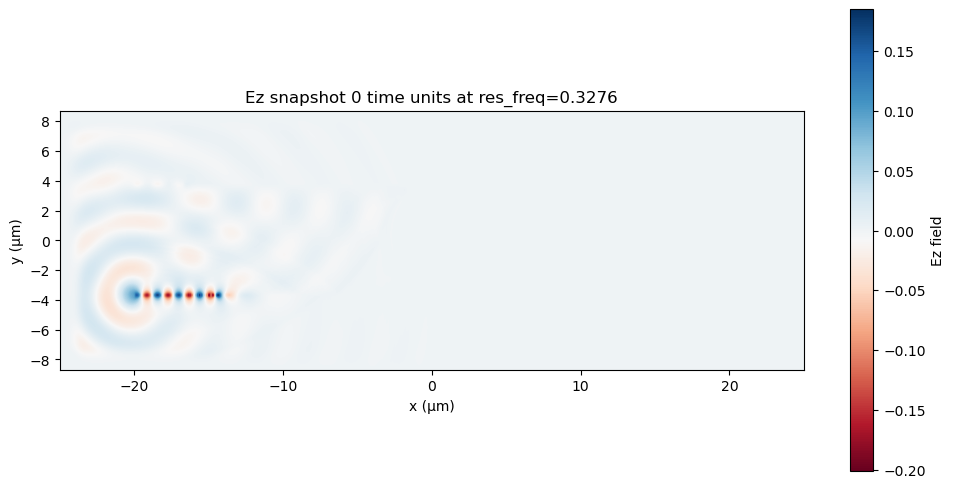

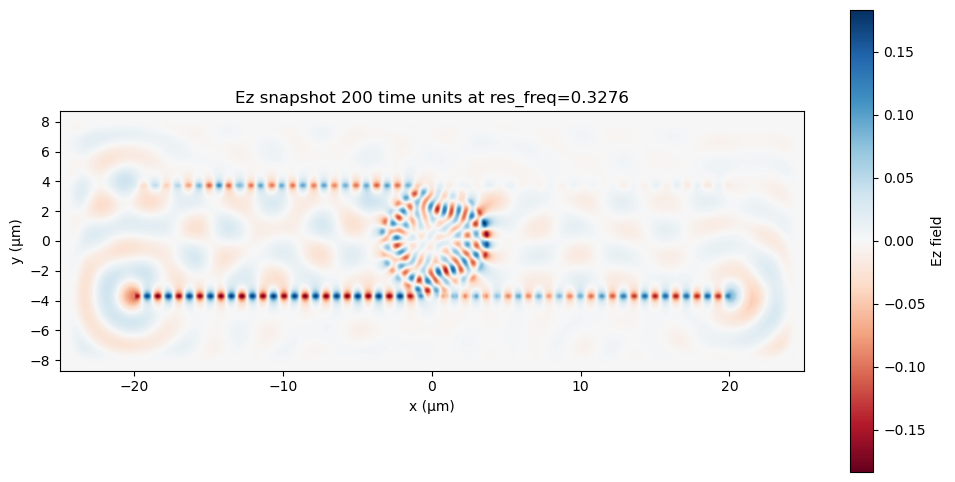

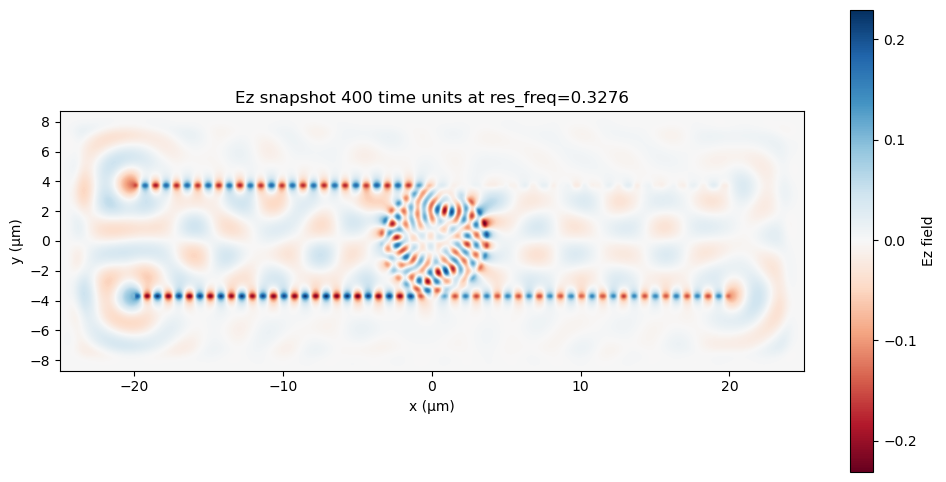

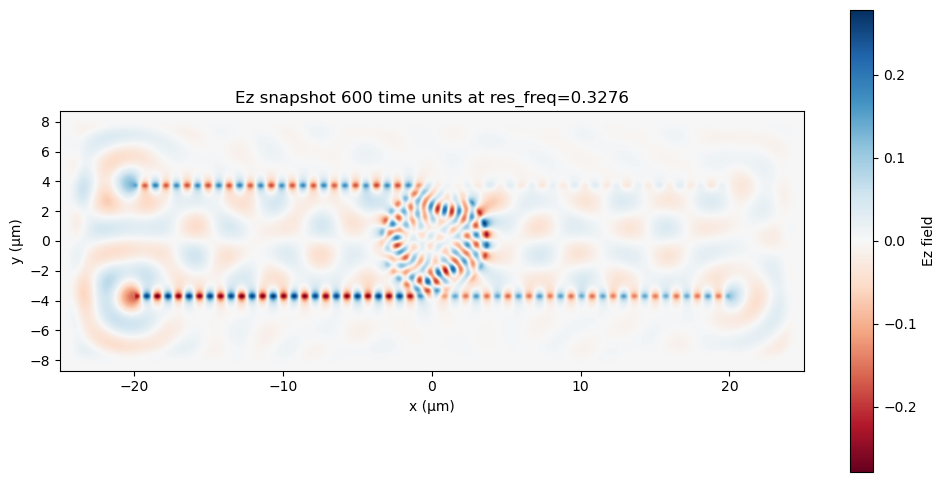

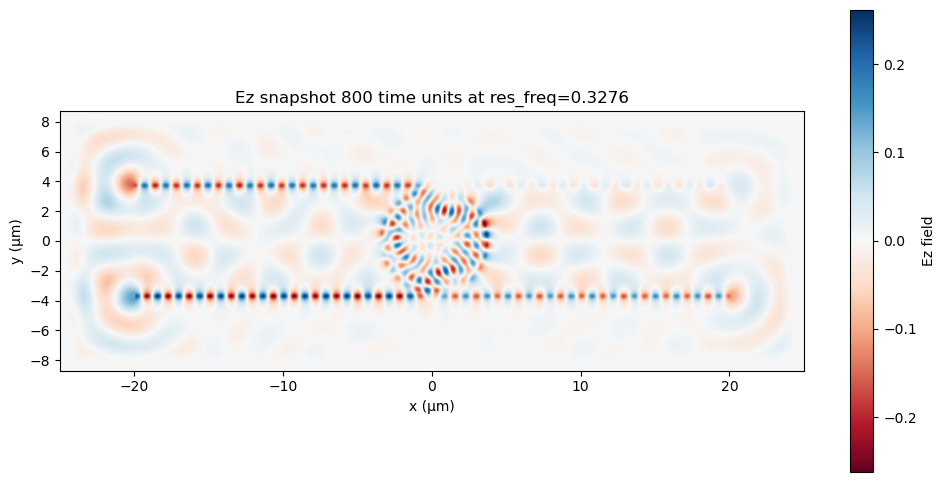

In [ ]:
# -----------------------------
# Source (broadband run)
# -----------------------------
source_x = -wg_length/2
source_y = disk_radius + gap + wg_width/2

fmin = 0.3
fmax = 0.35
df = fmax - fmin
nfreq = 1000
resolution = 30  # pixels/um

sources = [mp.Source(mp.GaussianSource(frequency=(fmin+fmax)/2, fwidth=df),
                     component=mp.Ez,
                     center=mp.Vector3(source_x, source_y),
                     size=mp.Vector3(0, wg_width, 0))]

# -----------------------------
# Flux monitors
# -----------------------------
flux_region_bus = mp.FluxRegion(center=mp.Vector3(wg_length/2 - 1,
                                                  disk_radius + gap + wg_width/2),
                                size=mp.Vector3(0, wg_width, 0))

# Drop port moved to left side of lower waveguide (same side as source, opposite waveguide)
flux_region_drop = mp.FluxRegion(center=mp.Vector3(-wg_length/2 + 1,
                                                   -disk_radius - gap - wg_width/2),
                                 size=mp.Vector3(0, wg_width, 0))

# -----------------------------
# First Simulation (spectra)
# -----------------------------
sim = mp.Simulation(cell_size=cell,
                    geometry=geometry,
                    sources=sources,
                    boundary_layers=pml_layers,
                    resolution=resolution)

trans_flux_bus = sim.add_flux((fmin+fmax)/2, df, nfreq, flux_region_bus)
trans_flux_drop = sim.add_flux((fmin+fmax)/2, df, nfreq, flux_region_drop)

sim.run(until_after_sources=mp.stop_when_fields_decayed(50, mp.Ez, mp.Vector3(), 5e-3))

frequencies = np.array(mp.get_flux_freqs(trans_flux_bus))
flux_bus = np.array(mp.get_fluxes(trans_flux_bus))
flux_drop = np.array(mp.get_fluxes(trans_flux_drop))

# -----------------------------
# Find resonance from max |flux_drop|
# -----------------------------
res_freq = frequencies[np.argmax(np.abs(flux_drop))]
print(f"Resonance frequency (max |drop port|): {res_freq:.6f} 1/um")

## Conversion: Meep freq (1/um) → THz
c0 = 299792458  # m/s
um_scale = 1e-6  # 1 µm in m
freq_thz = frequencies * c0 / um_scale / 1e12
res_freq_thz = res_freq * c0 / um_scale / 1e12

# Plot
plt.figure(figsize=(8,5))
plt.plot(freq_thz, flux_bus, label='Bus (top, right)')
plt.plot(freq_thz, flux_drop, label='Drop (bottom, left)')
plt.axvline(res_freq_thz, color='r', ls='--', label=f'Peak (drop) = {res_freq_thz:.2f} THz')
plt.xlabel('Frequency (THz)')
plt.ylabel('Flux')
plt.title('Broadband transmission spectra (Gaussian source)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# -----------------------------
# Second Simulation (single freq)
# -----------------------------
sources_res = [mp.Source(mp.ContinuousSource(frequency=res_freq),
                         component=mp.Ez,
                         center=mp.Vector3(source_x, source_y),
                         size=mp.Vector3(0, wg_width, 0))]

sim_res = mp.Simulation(cell_size=cell,
                        geometry=geometry,
                        sources=sources_res,
                        boundary_layers=pml_layers,
                        resolution=resolution)

ez_data = []
def store_fields(sim):
    ez_data.append(sim.get_array(center=mp.Vector3(),
                                 size=cell,
                                 component=mp.Ez))

sim_res.run(mp.at_every(20, store_fields), until=1000)

# -----------------------------
# Plot Ez snapshots
# -----------------------------
for i, field in enumerate(ez_data):
    if i % 10 == 0:
        plt.figure(figsize=(12,6))
        plt.imshow(np.rot90(field), cmap="RdBu", origin="lower",
                   extent=[-cell_x/2, cell_x/2, -cell_y/2, cell_y/2])
        plt.colorbar(label="Ez field")
        plt.title(f"Ez snapshot {i*20} time units at res_freq={res_freq:.4f}")
        plt.xlabel("x (µm)")
        plt.ylabel("y (µm)")
        plt.show()